In [1]:
import numpy as np
from matplotlib import pyplot as plt

import fretbursts as frb
import burstH2MM as bhm

filename = 'HP3_TE300_SPC630.hdf5'
# load the data into the data object frbdata
frbdata = frb.loader.photon_hdf5(filename)
# if the alternation period is correct, apply data
# plot the alternation histogram
# frb.bpl.plot_alternation_hist(frbdata) # commented so not displayed in notebook
frb.loader.alex_apply_period(frbdata)
# calcualte the background rate
frbdata.calc_bg(frb.bg.exp_fit, F_bg=1.7)
# plot bg parameters, to verify quality
# frb.dplot(frbdata, frb.hist_bg) # commented so not displayed in notebook
# now perform burst search
frbdata.burst_search(m=10, F=6)
# make sure to set the appropriate thresholds of ALL size
# parameters to the particulars of your experiment
frbdata_sel = frbdata.select_bursts(frb.select_bursts.size, th1=50)
bdata = bhm.BurstData(frbdata_sel)

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [8]:
bdata.models.calc_models()

The model converged after 1 iterations

The model converged after 36 iterations

The model converged after 122 iterations

The model converged after 410 iterations

2

In [9]:
amodel = bdata.models[0]
type(amodel)

burstH2MM.BurstSort.H2MM_result

In [10]:
bdata.models[0] is bdata.models.opts[0]

True

In [11]:
name = bdata.auto_div(2)
type(bdata.div_models[name])

burstH2MM.BurstSort.H2MM_list

In [12]:
bdata.auto_div(2, name="mydivisor")
type(bdata.div_models["mydivisor"])

burstH2MM.BurstSort.H2MM_list

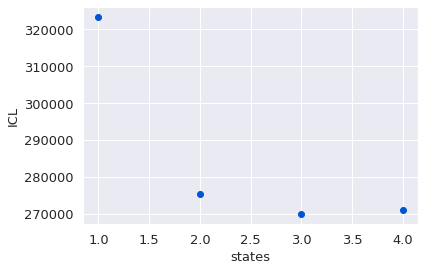

In [13]:
# calculate models
bdata.models.calc_models()
bhm.ICL_plot(bdata.models)

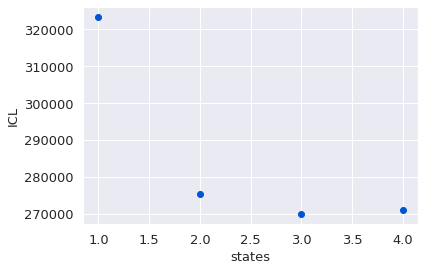

In [14]:
models_list = bdata.models
models_list.calc_models()
bhm.ICL_plot(models_list)

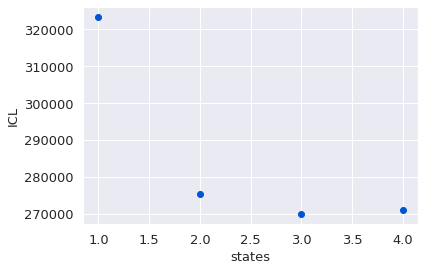

In [15]:
models_list = bdata.models
models_list.calc_models()
# models_list refers to the same thing as bdata.models
bhm.ICL_plot(bdata.models)

In [16]:
bdata.auto_div(1, name="one_div")
# extract the H2MM_list divisor model into its own variable
div_list = bdata.div_models["one_div"]

In [17]:
bdata.div_models["one_div"].calc_models()

The model converged after 2 iterations

The model converged after 27 iterations

The model converged after 82 iterations

The model converged after 402 iterations

2

In [18]:
div_list.calc_models()

2